## HW2: Linear Discriminant Analysis
In hw2, you need to implement [Fisher’s linear discriminant](https://towardsdatascience.com/fishers-linear-discriminant-intuitively-explained-52a1ba79e1bb) by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get **zero point** by simply calling `sklearn.discriminant_analysis.LinearDiscriminantAnalysis` 

## Load data

In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
x_train, x_test, y_train, y_test = np.load('classification_data.npy', allow_pickle=True)

In [27]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3750, 2)
(3750,)
(1250, 2)
(1250,)


In [28]:
x1 = []
y1 = []
x2 = []
y2 = []
n1 = 0  # class 1 number
n2 = 0  # class 2 number

for i in range(len(y_train)):
    if(y_train[i] == 0):
        x1.append(x_train[i][0])
        y1.append(x_train[i][1])
        n1 += 1
    elif(y_train[i] == 1):
        x2.append(x_train[i][0])
        y2.append(x_train[i][1])
        n2 += 1

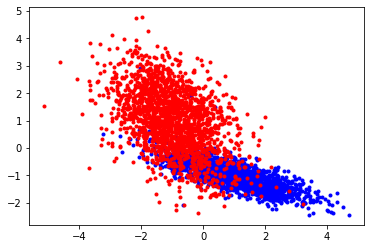

In [29]:
plt.plot(x1, y1, ".", color="blue")
plt.plot(x2, y2, ".", color="red")

## 1. Compute the mean vectors mi, (i=1,2) of each 2 classes

In [30]:
## Your code HERE
# mean_vector = [sum(x1)/len(x1), sum(x2)/len(x2)]
# print(mean_vector)
m1 = np.array([sum(x1)/len(x1), sum(y1)/len(y1)])
m2 = np.array([sum(x2)/len(x2), sum(y2)/len(y2)])

In [31]:
print(f"mean vector of class 1: {m1}\n", f"mean vector of class 2: {m2}")

mean vector of class 1: [ 0.99253136 -0.99115481]
 mean vector of class 2: [-0.9888012   1.00522778]


## 2. Compute the Within-class scatter matrix SW

In [32]:
xm = x_train[0] - m1
xm = np.reshape(xm, (2, 1))
print(type(xm))
print(xm.shape)

print((xm).dot(xm.transpose()))  # 2*1 1*2 -> 2*2

<class 'numpy.ndarray'>
(2, 1)
[[ 4.08048545 -1.40378116]
 [-1.40378116  0.48293311]]


In [33]:
## Your code HERE

sw = np.zeros((2, 2))

for i in range(len(x_train)):

    if y_train[i] == 0:
        c1_mat = np.reshape((x_train[i] - m1), (2, 1))
        sw += c1_mat.dot(c1_mat.transpose())

    elif y_train[i] == 1:
        c2_mat = np.reshape((x_train[i] - m2), (2, 1))
        sw += c2_mat.dot(c2_mat.transpose())

In [34]:
print(f"Within-class scatter matrix SW: {sw}")

Within-class scatter matrix SW: [[ 4337.38546493 -1795.55656547]
 [-1795.55656547  2834.75834886]]


## 3.  Compute the Between-class scatter matrix SB

In [35]:
## Your code HERE
# print(m2-m1)
m2_minus_m1 = np.reshape((m2-m1), (2, 1))
sb = m2_minus_m1.dot(m2_minus_m1.transpose())

In [36]:
print(f"Between-class scatter matrix SB: {sb}")

Between-class scatter matrix SB: [[ 3.92567873 -3.95549783]
 [-3.95549783  3.98554344]]


## 4. Compute the Fisher’s linear discriminant

In [37]:
## Your code HERE
w = (np.linalg.inv(sw)).dot(m2_minus_m1)

In [38]:
print(f" Fisher’s linear discriminant: {w}")

 Fisher’s linear discriminant: [[-0.000224  ]
 [ 0.00056237]]


In [39]:
print(w[0][0])
print(w[1][0])

-0.00022399822698344142
0.0005623693114442301


In [40]:
w = w # -> w 的倍數好像不影響還是怎麼樣的

c1_p = [] # n1 * 1
c1_y = [] # n2 * 1
for i in range(len(x1)):
    c1_p.append(x1[i]*w[0][0] + y1[i]*w[1][0])
    c1_y.append(0)

c2_p = []
c2_y = []
for i in range(len(x2)):
    c2_p.append(x2[i]*w[0][0] + y2[i]*w[1][0])
    c2_y.append(1)

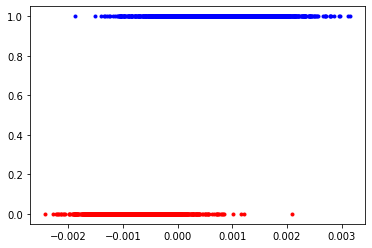

In [41]:
plt.plot(c1_p, c1_y, ".", color="red")
plt.plot(c2_p, c2_y, ".", color="blue")

## 5. Project the test data by linear discriminant and get the class prediction by `K` nearest-neighbor rule. Please report the accuracy score with `K` values from 1 to 5
you can use `accuracy_score` function from `sklearn.metric.accuracy_score`

In [42]:
def k_neighbor(k, project_1d, space_1d):
    dis = []
    for i in space_1d:
        dis.append((project_1d - i))

    dis = np.absolute(dis)

    mink_class = []
    for i in range (k):
        min_id = np.argmin(dis)
        mink_class.append(y_train[min_id])
        dis[min_id] = 1e10
    
    vote_result = np.sum(mink_class)
    if vote_result > k/2:  # more than half vote for class 1 so that sum is greater than k*1/2
        return 1
    else:
        return 0  # 如果同票，也就是 vote_result == k/2 -> 分給 class0


In [62]:
# 先 project x_train to the 1 維空間
# 再 project x_test to that same 1 維空間
# 計算 x_train 最近的 k 個點，看那 k 個點多數決該 x_test 的 y 應該是 class 1 還是 class 2
space_1d = []
for i in x_train:
    space_1d.append(i[0]*w[0][0] + i[1]*w[1][0])


k = 5
y_pred = []

for i in x_test:
    project_1d = i[0]*w[0][0] + i[1]*w[1][0]
    y_pred.append(k_neighbor(k, project_1d, space_1d))


In [50]:
def accuracy_score(y_test, y_pred):
    correct = 0
    for i in range(len(y_test)):
        if y_test[i] == y_pred[i]:
            correct += 1
    return correct / len(y_test)

In [63]:
acc = accuracy_score(y_test, y_pred)

In [64]:
print(f"Accuracy of test-set {acc}")

Accuracy of test-set 0.8912


## 6. Plot the 1) best projection line on the training data and show the slope and intercept on the title (you can choose any value of intercept for better visualization) 2) colorize the data with each class 3) project all data points on your projection line. Your result should look like [this image](https://i.imgur.com/tubMQpw.jpg)

In [47]:
print(w[0][0])
print(w[1][0])

a = w[0][0]
b = w[1][0]

-0.00022399822698344142
0.0005623693114442301


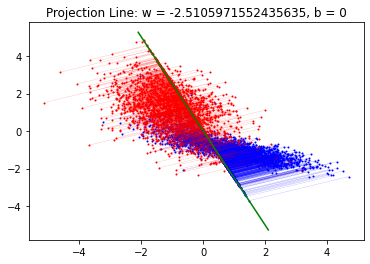

In [48]:
# 平行

m = (w[1][0] * 1000) / (w[0][0] * 1000)

p_c1_x = []
p_c1_y = []
p_c2_x = []
p_c2_y = []

for i in range(len(x1)):
    # t = (-a*x1[i] -b*y1[i])/(a*a + b*b)
    # t = (b*x1[i] - a*y1[i]) / (a*a + b*b)
    # t = (y1[i] - m*x1[i]) / (m*a + b)
    t = (b*x1[i] - a*y1[i])/(a*a + b*b)
    px = x1[i] + t*(-b)
    py = y1[i] + t*a
    p_c1_x.append(px)
    p_c1_y.append(py)

    plt.plot([x1[i], px], [y1[i], py], color="blue", linewidth=0.1)

for i in range(len(x2)):
    # t = (-a*x2[i] -b*y2[i])/(a*a + b*b)
    # t = (b*x2[i] - a*y2[i]) / (a*a + b*b)
    t = (b*x2[i] - a*y2[i])/(a*a + b*b)
    px = x2[i] + t*(-b)
    py = y2[i] + t*a
    p_c2_x.append(px)
    p_c2_y.append(py)

    plt.plot([x2[i], px], [y2[i], py], color="red", linewidth=0.1)

s = 2.1
plt.plot([-s, s], [-s*m, s*m], color="green")
# plt.plot(x1, y1, ".", color="blue")
# plt.plot(x2, y2, ".", color="red")

# plt.plot(p_c1_x, p_c1_y, ".", color="blue")
# plt.plot(p_c2_x, p_c2_y, ".", color="red")

plt.scatter(x1, y1, s=1, marker='o',edgecolors='b')
plt.scatter(x2, y2, s=1, marker='o',edgecolors='r')
plt.scatter(p_c1_x, p_c1_y, s=1, marker='o',edgecolors='b')
plt.scatter(p_c2_x, p_c2_y, s=1, marker='o',edgecolors='r')

title = "Projection Line: w = " + str(m) + ", b = 0"

plt.title(title) 

plt.show()